<a href="https://colab.research.google.com/github/nityamjsr/Hackathon/blob/main/analytics_vidhya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import feature_selection

In [53]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head(5)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [7]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [8]:
dic={}
categorical_columns=[]
numerical_columns=[]
for i in train.columns:
  dic[i]=train[i].dtypes
  if (train[i].dtypes==object):
    print(train[i].value_counts())
    categorical_columns.append(i)
  else:
    numerical_columns.append(i)

print(dic)

C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: City_Code, dtype: int64
Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64
Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64
No     42460
Yes     8422
Name: Is_Spouse, dtype: int64
X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64
1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0 

In [9]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [10]:
print(numerical_columns)
print(categorical_columns)

['ID', 'Region_Code', 'Upper_Age', 'Lower_Age', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response']
['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration']


In [11]:
categorical_columns+=['Reco_Policy_Cat','Holding_Policy_Type','Response']
for i in numerical_columns:
  if i in categorical_columns:
    numerical_columns.remove(i)

In [12]:
print(numerical_columns)
print(categorical_columns)

['ID', 'Region_Code', 'Upper_Age', 'Lower_Age', 'Reco_Policy_Cat', 'Reco_Policy_Premium']
['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration', 'Reco_Policy_Cat', 'Holding_Policy_Type', 'Response']


In [13]:
for i in numerical_columns:
  if i in categorical_columns:
    numerical_columns.remove(i)

In [14]:
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "Response"):
    
    """A function for Plotting the effect of variables(categorical data) on attrition """
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Response",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="Response",ax=ax[0])
        
    ax[0].set_title("Comparision of " + segment_by + " vs " + "Response")
    
    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)
        
    ax[1].set_title("Hired rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Response)")
    plt.tight_layout()

    plt.show()

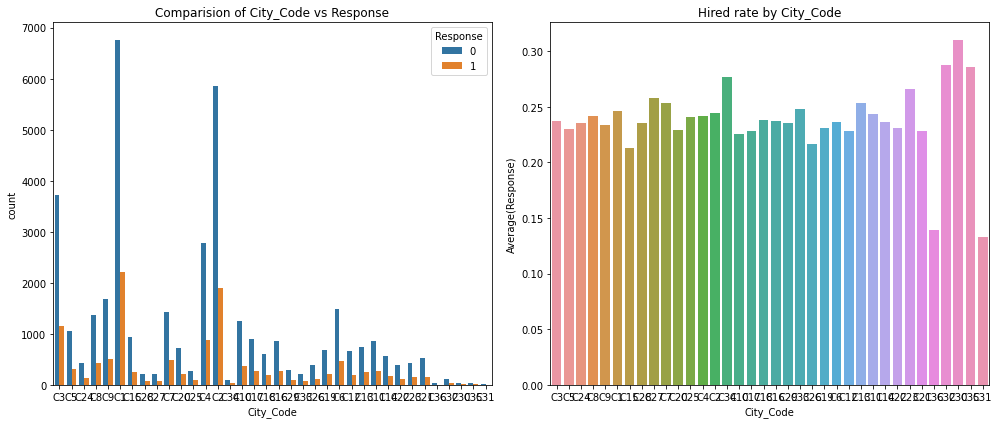

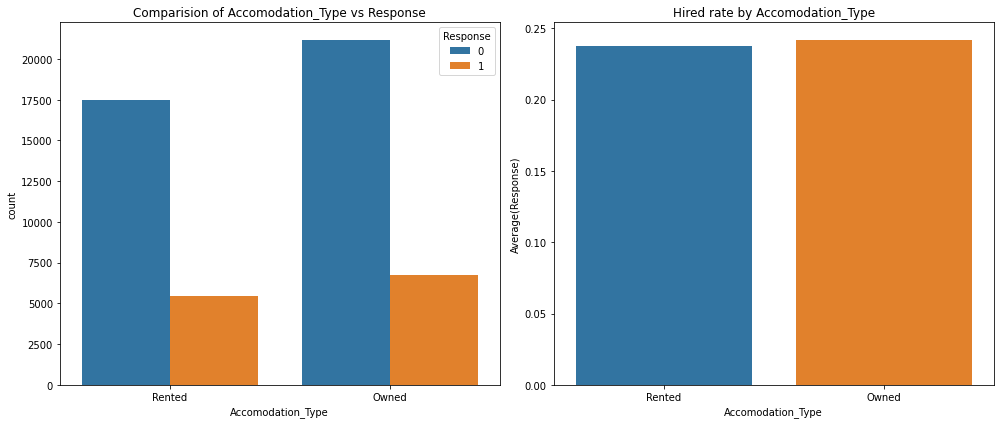

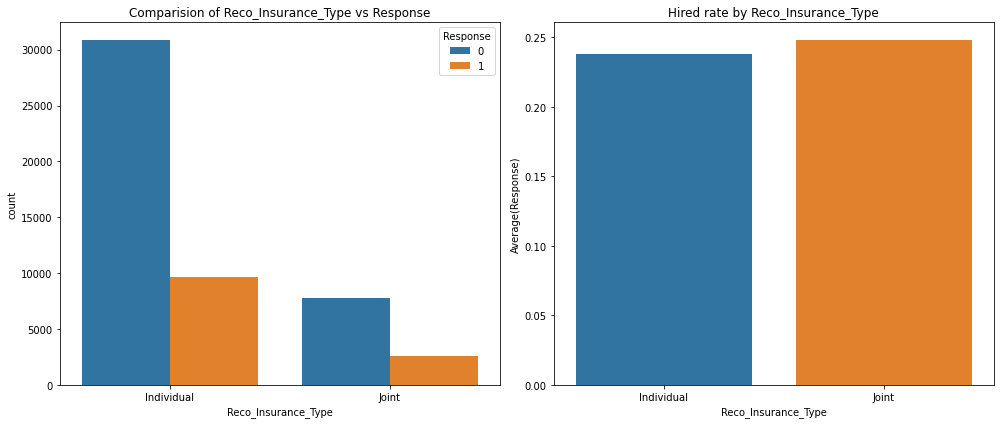

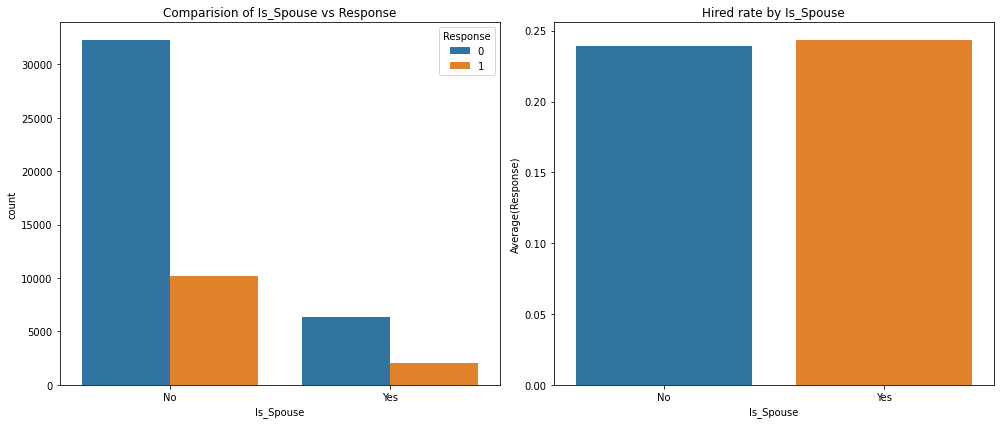

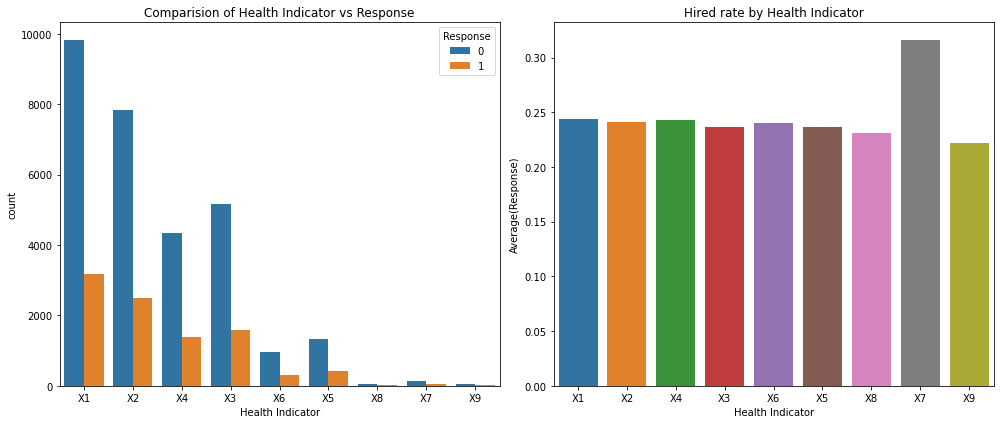

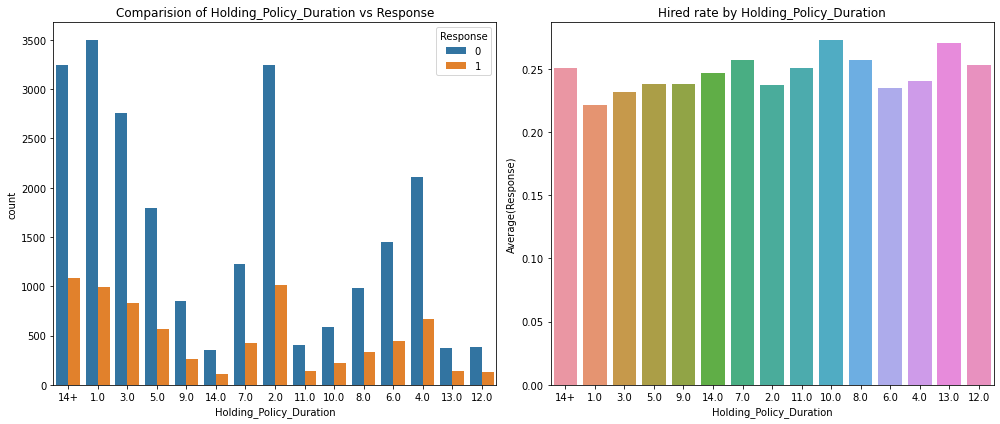

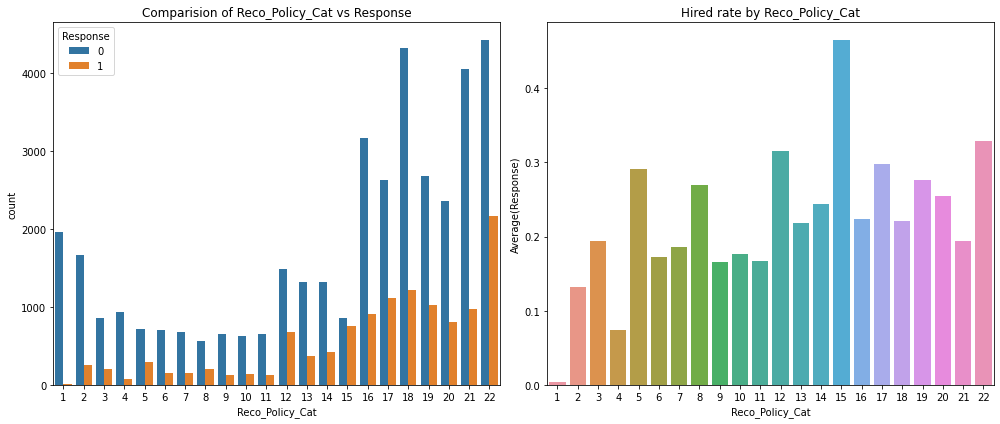

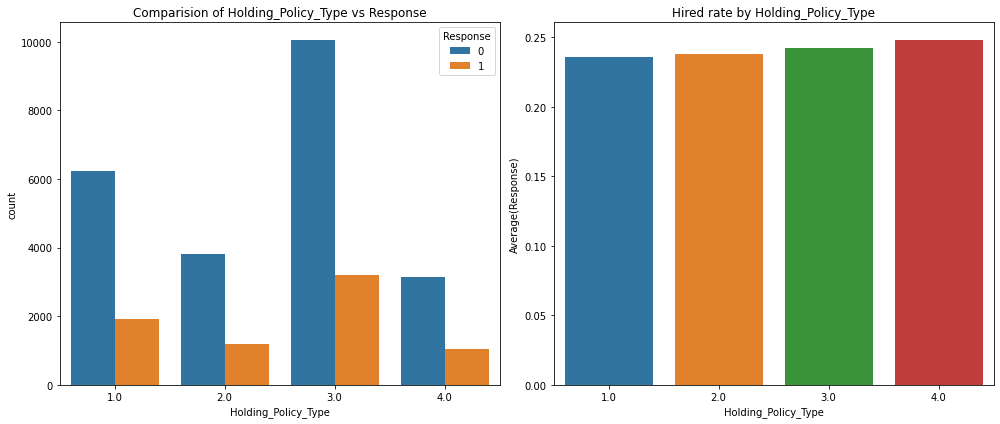

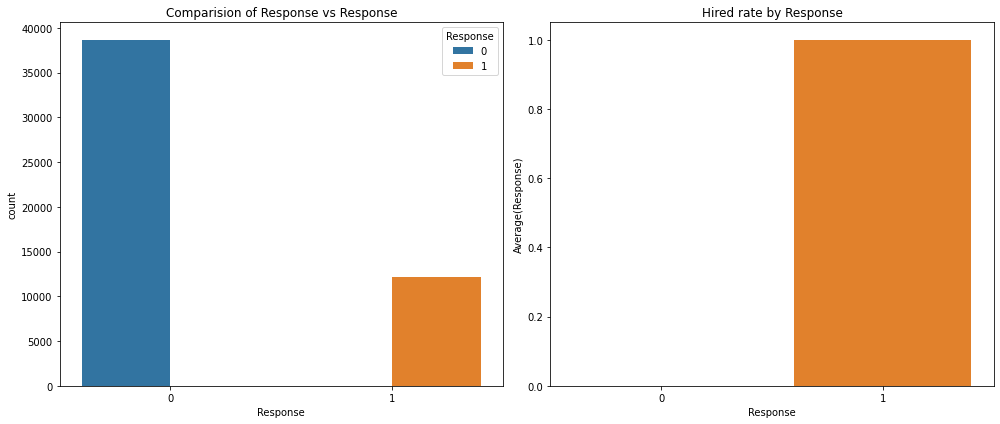

In [15]:
for i in categorical_columns:
  CategoricalVariables_targetPlots(train,segment_by=i)

In [16]:
for i in numerical_columns:
  train[i].fillna(train[i].median(),inplace = True)
# categorical_coloumns col
for i in categorical_columns:
  train[i].fillna(train[i].mode()[0],inplace = True)

In [17]:
train_individual=pd.DataFrame()
train_joint=train.loc[train['Reco_Insurance_Type']=='Joint']
train_individual=train.loc[train['Reco_Insurance_Type']=='Individual']
train_individual.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,X1,1.0,3.0,17,10640.0,0


In [18]:
train_joint=train_joint.drop(['ID','City_Code','Reco_Insurance_Type'],axis=1)
train_individual=train_individual.drop(['ID','City_Code','Reco_Insurance_Type','Upper_Age','Is_Spouse'],axis=1)
print(train_individual.head())
print(train_joint.head())

   Region_Code Accomodation_Type  ...  Reco_Policy_Premium Response
0         3213            Rented  ...              11628.0        0
2         3732             Owned  ...               7450.0        1
4         2190            Rented  ...              10404.0        0
5         1785            Rented  ...              15264.0        1
6          679             Owned  ...              10640.0        0

[5 rows x 9 columns]
   Region_Code Accomodation_Type  ...  Reco_Policy_Premium  Response
1         1117             Owned  ...              30510.0         0
3         4378             Owned  ...              17780.0         0
7         3175             Owned  ...              29344.0         1
8         3497             Owned  ...              27283.2         0
9          530             Owned  ...              21100.8         1

[5 rows x 11 columns]


In [19]:
def label_encoders(raw_data_clean):
  label_encoder = LabelEncoder() 
  for i in raw_data_clean.columns:
    if i in categorical_columns:
      raw_data_clean[i]= label_encoder.fit_transform(raw_data_clean[i])
  return(raw_data_clean)
  

In [20]:
train_individual_enc=label_encoders(train_individual)
train_joint_enc=label_encoders(train_joint)

In [21]:
train_individual_enc.head()

,Region_Code,Accomodation_Type,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,3213,1,36,0,5,2,21,11628.0,0
2,3732,0,32,0,0,0,18,7450.0,1
4,2190,1,44,1,8,0,15,10404.0,0
5,1785,1,52,1,10,0,21,15264.0,1
6,679,0,28,0,0,2,16,10640.0,0


In [22]:
# VIF dataframe 
vif_data_joint = pd.DataFrame() 
vif_data_individual= pd.DataFrame() 
vif_data_joint["feature"] = train_joint_enc.columns 
vif_data_individual['feature']=train_individual_enc.columns
# calculating VIF for each feature 
vif_data_joint["VIF"] = [variance_inflation_factor(train_joint_enc.values, i) 
                          for i in range(len(train_joint_enc.columns))] 
vif_data_individual["VIF"] = [variance_inflation_factor(train_individual_enc.values, i) 
                          for i in range(len(train_individual_enc.columns))] 
  
print(vif_data_joint)
print(vif_data_individual)

                    feature        VIF
0               Region_Code   2.314222
1         Accomodation_Type   1.313360
2                 Upper_Age  58.249337
3                 Lower_Age  18.954817
4                 Is_Spouse   5.952599
5          Health Indicator   1.675773
6   Holding_Policy_Duration   2.041185
7       Holding_Policy_Type   4.849875
8           Reco_Policy_Cat   5.637484
9       Reco_Policy_Premium  35.334051
10                 Response   1.345563
                   feature        VIF
0              Region_Code   2.337280
1        Accomodation_Type   1.873598
2                Lower_Age  30.540317
3         Health Indicator   1.576363
4  Holding_Policy_Duration   1.933149
5      Holding_Policy_Type   4.190612
6          Reco_Policy_Cat   5.026239
7      Reco_Policy_Premium  30.262736
8                 Response   1.324374


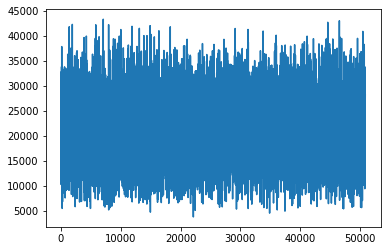

In [23]:
plt.plot(train_joint_enc['Reco_Policy_Premium'])

In [24]:
print(train.shape)

(50882, 14)


In [25]:
train_joint_enc.head()

,Region_Code,Accomodation_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
1,1117,0,75,22,0,1,0,2,21,30510.0,0
3,4378,0,52,48,0,0,5,2,18,17780.0,0
7,3175,0,75,73,1,3,14,3,16,29344.0,1
8,3497,0,52,43,0,0,6,2,0,27283.2,0
9,530,0,59,26,1,0,12,3,17,21100.8,1


In [26]:
train_individual_enc_dropped=train_individual_enc.drop(['Region_Code'],axis=1)
train_individual_enc_dropped.head()

,Accomodation_Type,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,36,0,5,2,21,11628.0,0
2,0,32,0,0,0,18,7450.0,1
4,1,44,1,8,0,15,10404.0,0
5,1,52,1,10,0,21,15264.0,1
6,0,28,0,0,2,16,10640.0,0


In [27]:
train_joint_enc_dropped=train_joint_enc.drop(['Region_Code'],axis=1)
train_joint_enc_dropped.head()

,Accomodation_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
1,0,75,22,0,1,0,2,21,30510.0,0
3,0,52,48,0,0,5,2,18,17780.0,0
7,0,75,73,1,3,14,3,16,29344.0,1
8,0,52,43,0,0,6,2,0,27283.2,0
9,0,59,26,1,0,12,3,17,21100.8,1


In [28]:
scaler = StandardScaler()
train_individual_enc_dropped[['Lower_Age','Reco_Policy_Premium']] = scaler.fit_transform(train_individual_enc_dropped[['Lower_Age','Reco_Policy_Premium']])

In [29]:

train_joint_enc_dropped[['Upper_Age','Lower_Age','Reco_Policy_Premium']] = scaler.fit_transform(train_joint_enc_dropped[['Upper_Age','Lower_Age','Reco_Policy_Premium']])

In [30]:
train_individual_enc_dropped=pd.get_dummies(train_individual_enc_dropped,columns=['Accomodation_Type',	'Health Indicator',	'Holding_Policy_Duration',	'Holding_Policy_Type',	'Reco_Policy_Cat'],drop_first=True)


In [31]:
train_joint_enc_dropped=pd.get_dummies(train_joint_enc_dropped,columns=['Accomodation_Type',	'Health Indicator',	'Holding_Policy_Duration',	'Holding_Policy_Type',	'Reco_Policy_Cat'],drop_first=True)


In [32]:
print(train_joint_enc_dropped.shape)
train_joint_enc_dropped.head()

(10346, 52)


,Upper_Age,Lower_Age,Is_Spouse,Reco_Policy_Premium,Response,Accomodation_Type_1,Health Indicator_1,Health Indicator_2,Health Indicator_3,Health Indicator_4,Health Indicator_5,Health Indicator_6,Health Indicator_7,Health Indicator_8,Holding_Policy_Duration_1,Holding_Policy_Duration_2,Holding_Policy_Duration_3,Holding_Policy_Duration_4,Holding_Policy_Duration_5,Holding_Policy_Duration_6,Holding_Policy_Duration_7,Holding_Policy_Duration_8,Holding_Policy_Duration_9,Holding_Policy_Duration_10,Holding_Policy_Duration_11,Holding_Policy_Duration_12,Holding_Policy_Duration_13,Holding_Policy_Duration_14,Holding_Policy_Type_1,Holding_Policy_Type_2,Holding_Policy_Type_3,Reco_Policy_Cat_1,Reco_Policy_Cat_2,Reco_Policy_Cat_3,Reco_Policy_Cat_4,Reco_Policy_Cat_5,Reco_Policy_Cat_6,Reco_Policy_Cat_7,Reco_Policy_Cat_8,Reco_Policy_Cat_9,Reco_Policy_Cat_10,Reco_Policy_Cat_11,Reco_Policy_Cat_12,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21
1,1.497194,-1.167069,0,1.271968,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.042731,0.333263,0,-0.621947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,1.497194,1.775889,1,1.098496,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,-0.042731,0.044737,0,0.791899,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0.425942,-0.936249,1,-0.127892,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [33]:
y=train_individual_enc_dropped['Response']
X=train_individual_enc_dropped.drop(['Response'],axis=1)

In [34]:
yj=train_joint_enc_dropped['Response']
Xj=train_joint_enc_dropped.drop(['Response'],axis=1)

In [35]:
print(Xj.shape)

(10346, 51)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_j, X_test_j, y_train_j, y_test_j = train_test_split(Xj, yj, test_size=0.2, random_state=42)

In [37]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)
x_smote_j, y_smote_j = smote.fit_resample(X_train_j, y_train_j)
print(x_smote.shape,y_smote.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

(49380, 49) (49380,)


In [38]:
x_smote_j.shape

(12482, 51)

In [39]:
from sklearn.pipeline import Pipeline
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('LR',LogisticRegression())])))
#pipelines.append(('ScaledLASSO', Pipeline([('Scaler', MinMaxScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('EN', RandomForestClassifier())])))
pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledGBM', Pipeline([('Xgb', XGBClassifier())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, x_smote, y_smote, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

ScaledLR: 0.497023 (0.047396)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledEN: 0.790745 (0.080420)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledKNN: 0.692649 (0.090428)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledCART: 0.723410 (0.080213)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledGBM: 0.598967 (0.036721)


In [40]:
from sklearn.pipeline import Pipeline
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('LR',LogisticRegression())])))
#pipelines.append(('ScaledLASSO', Pipeline([('Scaler', MinMaxScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('EN', RandomForestClassifier())])))
pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledGBM', Pipeline([('Xgb', XGBClassifier())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, x_smote_j, y_smote_j, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

ScaledLR: 0.506086 (0.052164)
ScaledEN: 0.833452 (0.091735)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledKNN: 0.703833 (0.138062)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledCART: 0.737954 (0.099912)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledGBM: 0.727855 (0.051947)


In [41]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 1)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,8]

# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [42]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_smote, y_smote)

rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 90}

In [43]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_smote_j, y_smote_j)

rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   16.6s finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 90}

In [44]:
clf = RandomForestClassifier(bootstrap=False,
 max_depth= None,
 max_features= 'sqrt',
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators= 90)
clf.fit(x_smote,y_smote)
y_predicted=clf.predict(X_test)
target_names=['Non Response','Response']
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted, target_names=target_names))

[[4923 1283]
 [1245  657]]
              precision    recall  f1-score   support

Non Response       0.80      0.79      0.80      6206
    Response       0.34      0.35      0.34      1902

    accuracy                           0.69      8108
   macro avg       0.57      0.57      0.57      8108
weighted avg       0.69      0.69      0.69      8108



In [45]:
clf_j= RandomForestClassifier(bootstrap= False,
 max_depth= None,
 max_features= 'sqrt',
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators=90)
clf_j.fit(x_smote_j,y_smote_j)
y_predicted=clf_j.predict(X_test_j)
target_names=['Non Response','Response']
print(confusion_matrix(y_test_j, y_predicted))
print(classification_report(y_test_j, y_predicted, target_names=target_names))

[[1352  184]
 [ 439   95]]
              precision    recall  f1-score   support

Non Response       0.75      0.88      0.81      1536
    Response       0.34      0.18      0.23       534

    accuracy                           0.70      2070
   macro avg       0.55      0.53      0.52      2070
weighted avg       0.65      0.70      0.66      2070



In [87]:
test=pd.read_csv('test.csv')
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [88]:
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [89]:
#categorical_columns.remove('Response')
for i in numerical_columns:
  test[i].fillna(test[i].median(),inplace = True)
# categorical_coloumns col
for i in categorical_columns:
  test[i].fillna(test[i].mode()[0],inplace = True)

In [90]:
test_joint=test[test['Reco_Insurance_Type']=='Joint']
test_individual=test[test['Reco_Insurance_Type']=='Individual']
test_joint.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
9,50892,C3,957,Owned,Joint,41,37,Yes,X5,6.0,1.0,22,16934.4
15,50898,C11,2000,Owned,Joint,46,37,No,X1,14+,3.0,20,18333.0
24,50907,C3,3891,Owned,Joint,68,66,Yes,X1,5.0,3.0,9,24206.0
25,50908,C2,2810,Owned,Joint,55,54,Yes,X2,4.0,3.0,3,23091.2


In [91]:
test_joint_id=pd.DataFrame()
test_individual_id=pd.DataFrame()

test_joint_id['ID']=test_joint['ID']
test_individual_id['ID']=test_individual['ID']
test_joint=test_joint.drop(['ID','City_Code','Reco_Insurance_Type'],axis=1)
test_individual=test_individual.drop(['ID','City_Code','Reco_Insurance_Type','Upper_Age','Is_Spouse'],axis=1)
print(test_individual.head())
print(test_joint.head())

   Region_Code Accomodation_Type  ...  Reco_Policy_Cat Reco_Policy_Premium
0          156             Owned  ...                5             11934.0
2          564            Rented  ...               17              9240.0
3         1177            Rented  ...               18              9086.0
4          951             Owned  ...                5             22534.0
5         1329            Rented  ...               18              6150.0

[5 rows x 8 columns]
    Region_Code Accomodation_Type  ...  Reco_Policy_Cat  Reco_Policy_Premium
1             7             Owned  ...               18              32204.8
9           957             Owned  ...               22              16934.4
15         2000             Owned  ...               20              18333.0
24         3891             Owned  ...                9              24206.0
25         2810             Owned  ...                3              23091.2

[5 rows x 10 columns]


In [92]:
test_individual_enc=label_encoders(test_individual)
test_joint_enc=label_encoders(test_joint)

In [93]:
test_individual_enc_dropped=test_individual_enc.drop(['Region_Code'],axis=1)
test_individual_enc_dropped.head()
test_joint_enc_dropped=test_joint_enc.drop(['Region_Code'],axis=1)
test_joint_enc_dropped.head()

,Accomodation_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
1,0,69,68,1,0,8,2,17,32204.8
9,0,41,37,1,4,11,0,21,16934.4
15,0,46,37,0,0,5,2,19,18333.0
24,0,68,66,1,0,10,2,8,24206.0
25,0,55,54,1,1,9,2,2,23091.2


In [110]:
test_individual_enc_dropped[['Lower_Age','Reco_Policy_Premium']] = scaler.fit_transform(test_individual_enc_dropped[['Lower_Age','Reco_Policy_Premium']])
test_joint_enc_dropped[['Upper_Age','Lower_Age','Reco_Policy_Premium']] = scaler.fit_transform(test_joint_enc_dropped[['Upper_Age','Lower_Age','Reco_Policy_Premium']])

In [95]:
test_individual_enc_dropped=pd.get_dummies(test_individual_enc_dropped,columns=['Accomodation_Type',	'Health Indicator',	'Holding_Policy_Duration',	'Holding_Policy_Type',	'Reco_Policy_Cat'],drop_first=True)
test_joint_enc_dropped=pd.get_dummies(test_joint_enc_dropped,columns=['Accomodation_Type',	'Health Indicator',	'Holding_Policy_Duration',	'Holding_Policy_Type',	'Reco_Policy_Cat'],drop_first=True)


In [98]:
test_joint_id['Response']=clf_j.predict(test_joint_enc_dropped)

In [96]:
print(test_joint_id.shape,test_joint.shape)

(4464, 1) (4464, 10)


In [100]:
test_individual_id['Response']=clf.predict(test_individual_enc_dropped)

In [101]:
df=[test_joint_id,test_individual_id]
final=pd.concat(df)

In [102]:
final.head()

,ID,Response
1,50884,0
9,50892,1
15,50898,0
24,50907,0
25,50908,0


In [104]:
final=final.sort_values(by=['ID'])
final.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


In [106]:
final.shape


(21805, 2)

In [107]:
test.shape

(21805, 13)

In [108]:
final.to_csv('Output.csv',index=False)